In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import linear_model

In [2]:
df = pd.read_csv('../input/Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df = pd.read_csv('../input/Boston.csv',index_col =0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


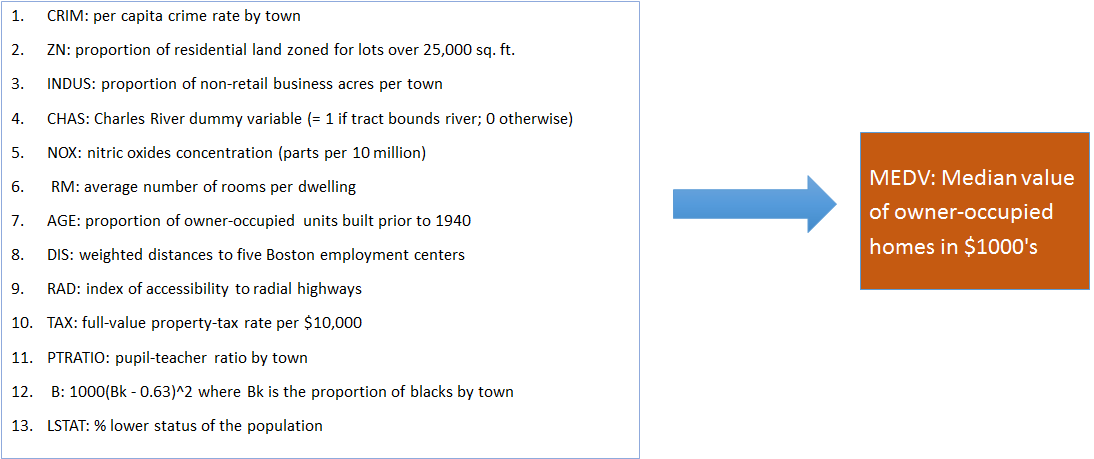

# Lower status and Median Value of the owner occupied homes

In [4]:
def draw_plot(fig_size_x = 15,
              fig_size_y = 10,
              tick_params_labelsize = 14,
             xlabel_name_fontsize = 20,
             ylabel_name_fontsize = 20,
             title_name_fontsize = 20):
    
    #get current figure 
    fig=plt.gcf()
    
    #set the size of the figure
    fig.set_size_inches(fig_size_x,fig_size_y)

    #get axes of the current figure 
    ax =  fig.gca()

    # set the label size of the ticks of the axes
    ax.tick_params(labelsize=tick_params_labelsize)

    # set the label size of the x axis
    ax.set_xlabel(xlabel_name,fontsize = xlabel_name_fontsize)

    # set the label size of the y axis
    ax.set_ylabel(ylabel_name,fontsize = ylabel_name_fontsize)

     # set the title of the plot
    ax.set_title(title_name,fontsize = title_name_fontsize)

D:\Applications\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


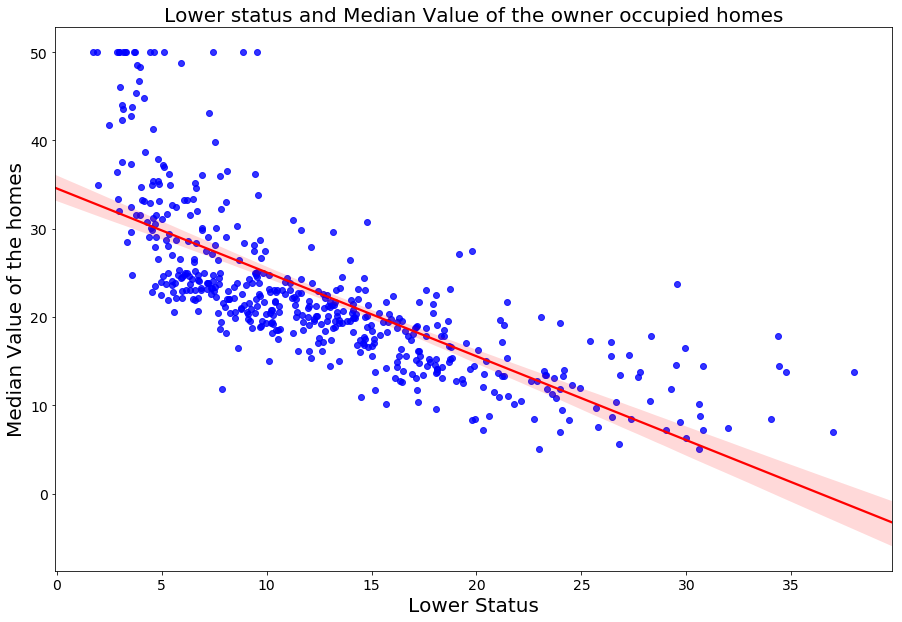

In [5]:
sns.regplot( x= 'lstat', y = 'medv' ,  color = 'blue' ,line_kws = {"color":"r"}, data = df)

title_name = "Lower status and Median Value of the owner occupied homes"
xlabel_name = "Lower Status"
ylabel_name = "Median Value of the homes"

draw_plot()

# Train and Test Split 

In [7]:
from sklearn.model_selection import train_test_split
features = ['lstat']
X = df[features]
y = df['medv']

In [8]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Single Linear Regression

In [9]:
model = linear_model.LinearRegression()

In [10]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [11]:
model.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
predictions = model.predict(val_X)

In [13]:
np.sqrt(metrics.mean_squared_error(val_y,predictions))

6.656600496741051

In [14]:
model.coef_

array([-0.97063097])

In [15]:
model.intercept_

34.78651468068163

# Age of the houses

D:\Applications\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


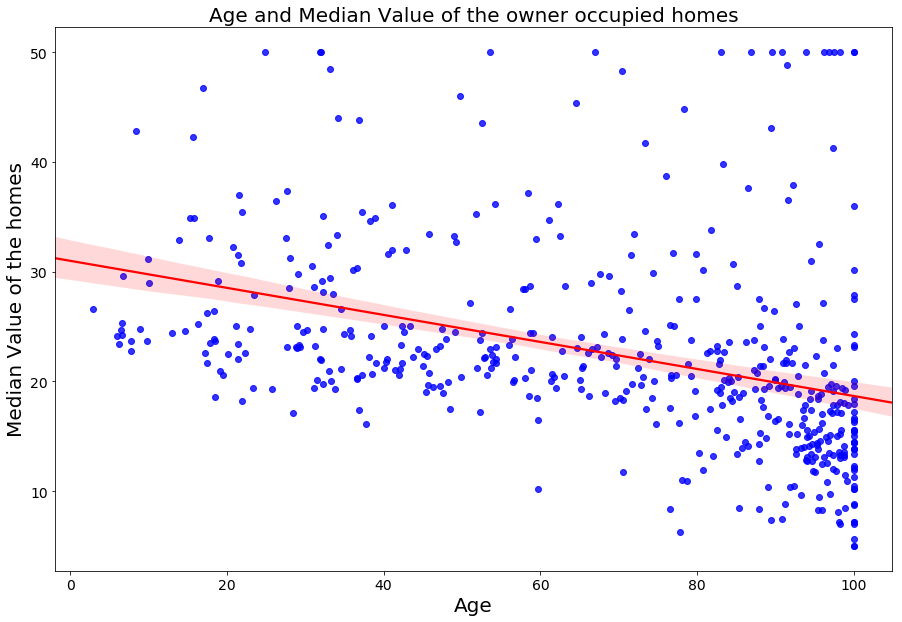

In [16]:
sns.regplot( x= 'age', y = 'medv' ,  color = 'blue' ,line_kws = {"color":"r"}, data = df)

title_name = "Age and Median Value of the owner occupied homes"
xlabel_name = "Age"
ylabel_name = "Median Value of the homes"

draw_plot()

# Multiple Linear Regression

In [18]:
from sklearn.model_selection import train_test_split
features = ['lstat','age']
X = df[features]
y = df['medv']

In [19]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

model.fit(train_X,train_y)

predictions = model.predict(val_X)

In [20]:
np.sqrt(metrics.mean_squared_error(val_y,predictions))

6.569961091537308

In [21]:
model.coef_

array([-1.0381031 ,  0.02797099])

In [22]:
model.intercept_

33.71043535630025

# Multiple Linear Regression ( all features)

In [24]:
cols = df.columns

In [25]:
cols

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [27]:
features = cols.drop('medv')

In [28]:
features

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [29]:
features.values

array(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat'], dtype=object)

In [30]:
X = df[features]
y = df['medv']

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

model.fit(train_X,train_y)

predictions = model.predict(val_X)

np.sqrt(metrics.mean_squared_error(val_y,predictions))

5.457311159564049

In [31]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


# Correlation

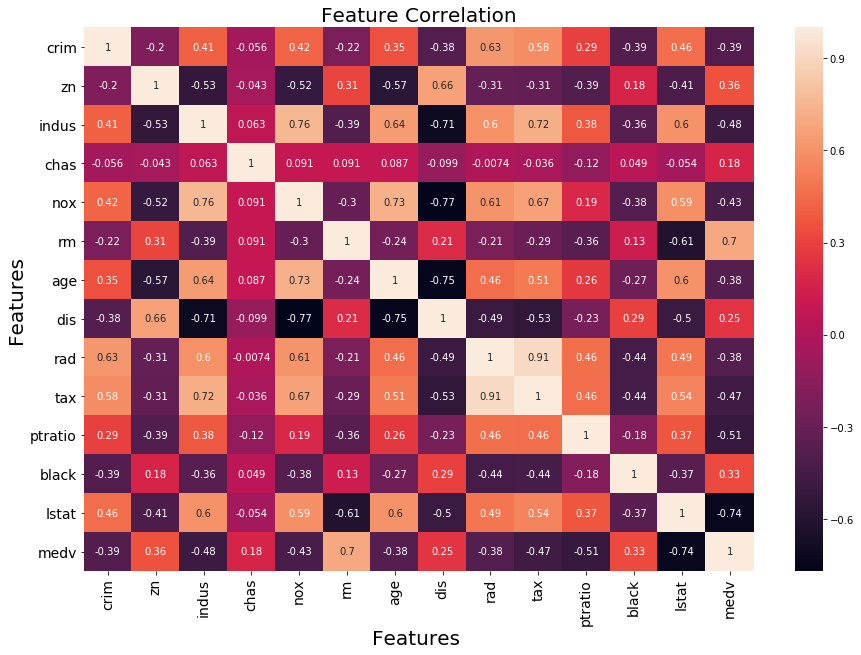

In [32]:
sns.heatmap(df.corr(),annot=True)

title_name = "Feature Correlation"
xlabel_name = "Features "
ylabel_name = "Features"

draw_plot()

In [33]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [34]:
df.corr().abs().unstack().sort_values(ascending = False)

medv     medv       1.000000
lstat    lstat      1.000000
zn       zn         1.000000
indus    indus      1.000000
chas     chas       1.000000
nox      nox        1.000000
rm       rm         1.000000
age      age        1.000000
dis      dis        1.000000
rad      rad        1.000000
tax      tax        1.000000
ptratio  ptratio    1.000000
black    black      1.000000
crim     crim       1.000000
rad      tax        0.910228
tax      rad        0.910228
nox      dis        0.769230
dis      nox        0.769230
indus    nox        0.763651
nox      indus      0.763651
age      dis        0.747881
dis      age        0.747881
lstat    medv       0.737663
medv     lstat      0.737663
age      nox        0.731470
nox      age        0.731470
tax      indus      0.720760
indus    tax        0.720760
dis      indus      0.708027
indus    dis        0.708027
                      ...   
zn       black      0.175520
black    zn         0.175520
chas     medv       0.175260
medv     chas 

# MLR Dropping tax

In [35]:
features = cols.drop(['medv','tax'])

In [36]:
features

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [37]:
X = df[features]
y = df['medv']

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

model.fit(train_X,train_y)

predictions = model.predict(val_X)

np.sqrt(metrics.mean_squared_error(val_y,predictions))

5.52780128386693

In [38]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,black,lstat
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33


# MLR dropping indus

In [39]:
features = cols.drop(['medv','indus'])

features

X = df[features]
y = df['medv']

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

model.fit(train_X,train_y)

predictions = model.predict(val_X)

np.sqrt(metrics.mean_squared_error(val_y,predictions))

5.455857754460457

# MLR dropping indus and age

In [40]:
features = cols.drop(['medv','indus','age'])

features

X = df[features]
y = df['medv']

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

model.fit(train_X,train_y)

predictions = model.predict(val_X)

np.sqrt(metrics.mean_squared_error(val_y,predictions))

5.4460506587017194

# Feature Interaction

In [41]:
df["lstat_age"] = df["lstat"] * df["age"]

In [42]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,lstat_age
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,324.696
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,721.146
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,246.233
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,134.652
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,288.886


D:\Applications\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


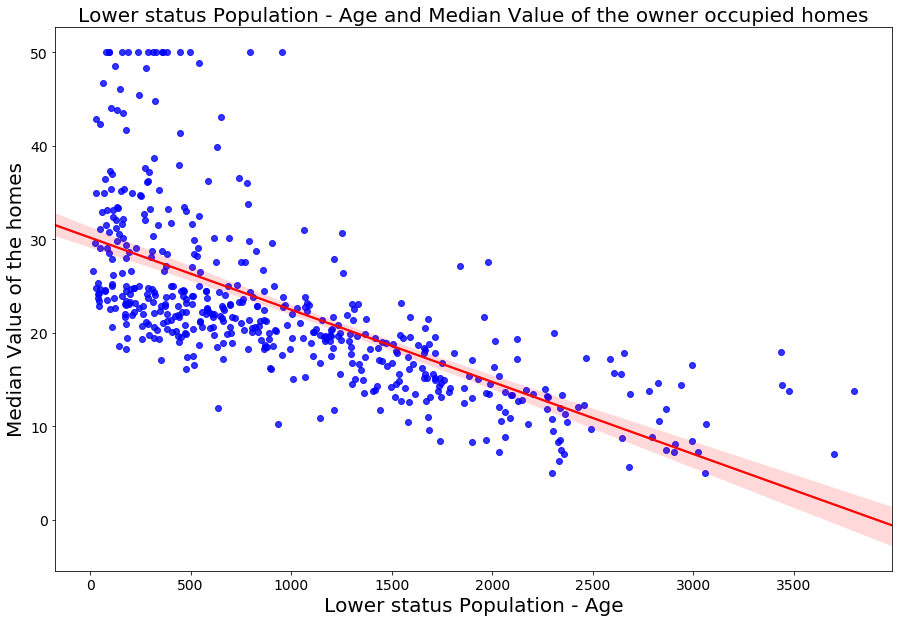

In [43]:
sns.regplot( x= 'lstat_age', y = 'medv' ,  color = 'blue' ,line_kws = {"color":"r"}, data = df)

title_name = "Lower status Population - Age and Median Value of the owner occupied homes"
xlabel_name = "Lower status Population - Age"
ylabel_name = "Median Value of the homes"

draw_plot()

In [44]:
np.corrcoef(df["medv"],df["lstat_age"])

array([[ 1.      , -0.670859],
       [-0.670859,  1.      ]])

In [ ]:
cols = df.columns

In [45]:
features = cols.drop(['medv','indus','age'])

X = df[features]
y = df['medv']

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

model.fit(train_X,train_y)

predictions = model.predict(val_X)

np.sqrt(metrics.mean_squared_error(val_y,predictions))

5.4460506587017194